In [91]:
from numpy import arange, zeros, tanh
import matplotlib.pyplot as plt
import neuronioE
import neuronioI

In [92]:
plt.style.use('bmh')

In [93]:
def euler():
    g_sin = 0.05
    tau_s = 0.1
    tau_d = 3
    E_rev = 0

    VE, hE, nE, s = zeros(N), zeros(N), zeros(N), zeros(N)
    VE[0] = -65
    hE[0] = neuronioE.alpha('h', VE[0]) / (neuronioE.alpha('h',VE[0])+neuronioE.beta('h',VE[0]))
    hE[0] = neuronioE.alpha('n', VE[0]) / (neuronioE.alpha('n',VE[0])+neuronioE.beta('n',VE[0]))

    VI, hI, nI, j_sin = zeros(N), zeros(N), zeros(N), zeros(N)
    VI[0] = -65
    hI[0] = neuronioI.alpha('h', VI[0]) / (neuronioI.alpha('h',VI[0])+neuronioI.beta('h',VI[0]))
    hI[0] = neuronioI.alpha('n', VI[0]) / (neuronioI.alpha('n',VI[0])+neuronioI.beta('n',VI[0]))
    s[0] = 0

    for k in range(N-1):
        VE[k+1] = VE[k] + dt * neuronioE.dvdt(VE[k],hE[k],nE[k],j_inj[k])
        hE[k+1] = hE[k] + dt * neuronioE.dhdt(VE[k],hE[k])
        nE[k+1] = nE[k] + dt * neuronioE.dndt(VE[k],nE[k])
        s[k+1] = s[k] + dt * (((1+tanh(VE[k]/4))/2)*((1-s[k])/tau_s)-s[k]/tau_d)

        j_sin[k] = g_sin * s[k] * (E_rev - VI[k])

        VI[k+1] = VI[k] + dt * neuronioI.dvdt(VI[k],hI[k],nI[k],j_sin[k])
        hI[k+1] = hI[k] + dt * neuronioI.dhdt(VI[k],hI[k])
        nI[k+1] = nI[k] + dt * neuronioI.dndt(VI[k],nI[k])

    return VE, VI, j_sin

In [94]:
tmax = 30
ti, tf = 5, 15
dt = 0.001
N = round(tmax/dt)
t = arange(0, tmax, dt)
corrente = lambda j: j*(t>=ti)-j*(t>=tf)
j_inj = corrente(j=0.5)

In [95]:
VE, VI, j_sin = euler()

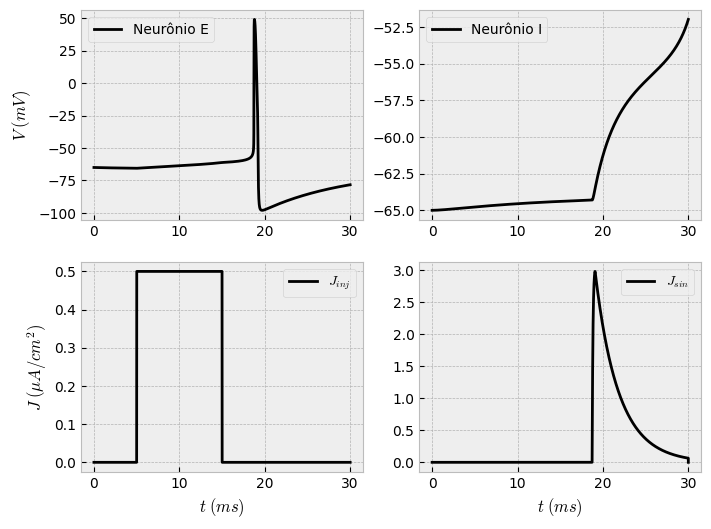

In [96]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.plot(t, VE, 'k', label='Neurônio E')
plt.legend()
plt.ylabel('$V \; (mV)$')

plt.subplot(2,2,2)
plt.plot(t, VI, 'k', label='Neurônio I')
plt.legend()

plt.subplot(2,2,3)
plt.plot(t, j_inj, 'k', label='$J_{inj}$')
plt.legend()
plt.ylabel('$J \; (\mu A/cm^2)$')
plt.xlabel('$t \; (ms)$')

plt.subplot(2,2,4)
plt.plot(t, j_sin, 'k', label='$J_{sin}$')
plt.legend()
plt.xlabel('$t \; (ms)$')

plt.show()